In [1]:
import os

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import pearsonr, spearmanr, kendalltau
import statsmodels.api as sm

In [2]:
cat_list = ['Openness_to_Change', 'Conservation', 'Self-Enhancement', 'Self-Transcendence',]
val_list = ['Ach', 'Ben', 'Con', 'Hed', 'Pow', 'Sec', 'SD', 'Sti', 'Tra', 'Uni']
group_list = [f'Group_{num+1}' for num in range(100)]
real_list = ['close_Openness_to_Change', 'close_Conservation', 'close_Self-Enhancement', 'close_Self-Transcendence', 'close_Ach', 'close_Ben', 'close_Con', 'close_Hed', 'close_Pow', 'close_Sec', 'close_SD', 'close_Sti', 'close_Tra', 'close_Uni']
# reverse_list = ['reverse_Ach', 'reverse_Ben', 'reverse_Con', 'reverse_Hed', 'reverse_Pow', 'reverse_Sec', 'reverse_SD', 'reverse_Sti', 'reverse_Tra', 'reverse_Uni', 'reverse_Conservation', 'reverse_Openness_to_Change', 'reverse_Self-Enhancement', 'reverse_Self-Transcendence']
# close_reverse_list = ['close_reverse_Ach_1', 'close_reverse_Ben_1', 'close_reverse_Con_1', 'close_reverse_Hed_1close_reverse_Pow_1', 'close_reverse_Sec_1', 'close_reverse_SD_1', 'close_reverse_Sti_1', 'close_reverse_Tra_1', 'close_reverse_Uni_1', 'close_reverse_Openness_to_Change_1', 'close_reverse_Self-Enhancement_1', 'close_reverse_Conservation_1', 'close_reverse_Self-Transcendence_1']
close_2 = ['close_Openness_to_Change_2', 'close_Conservation_2', 'close_Self-Enhancement_2', 'close_Self-Transcendence_2', 'close_Ach_2', 'close_Ben_2', 'close_Con_2', 'close_Hed_2', 'close_Pow_2', 'close_Sec_2', 'close_SD_2', 'close_Sti_2', 'close_Tra_2', 'close_Uni_2']
close_3 = ['close_Openness_to_Change_3', 'close_Conservation_3', 'close_Self-Enhancement_3', 'close_Self-Transcendence_3', 'close_Ach_3', 'close_Ben_3', 'close_Con_3', 'close_Hed_3', 'close_Pow_3', 'close_Sec_3', 'close_SD_3', 'close_Sti_3', 'close_Tra_3', 'close_Uni_3']
close_4 = ['close_Openness_to_Change_4', 'close_Conservation_4', 'close_Self-Enhancement_4', 'close_Self-Transcendence_4', 'close_Ach_4', 'close_Ben_4', 'close_Con_4', 'close_Hed_4', 'close_Pow_4', 'close_Sec_4', 'close_SD_4', 'close_Sti_4', 'close_Tra_4', 'close_Uni_4']
close_5 = ['close_Openness_to_Change_5', 'close_Conservation_5', 'close_Self-Enhancement_5', 'close_Self-Transcendence_5', 'close_Ach_5', 'close_Ben_5', 'close_Con_5', 'close_Hed_5', 'close_Pow_5', 'close_Sec_5', 'close_SD_5', 'close_Sti_5', 'close_Tra_5', 'close_Uni_5']
close_6 = ['close_Openness_to_Change_6', 'close_Conservation_6', 'close_Self-Enhancement_6', 'close_Self-Transcendence_6', 'close_Ach_6', 'close_Ben_6', 'close_Con_6', 'close_Hed_6', 'close_Pow_6', 'close_Sec_6', 'close_SD_6', 'close_Sti_6', 'close_Tra_6', 'close_Uni_6']
close_7 = ['close_Openness_to_Change_7', 'close_Conservation_7', 'close_Self-Enhancement_7', 'close_Self-Transcendence_7', 'close_Ach_7', 'close_Ben_7', 'close_Con_7', 'close_Hed_7', 'close_Pow_7', 'close_Sec_7', 'close_SD_7', 'close_Sti_7', 'close_Tra_7', 'close_Uni_7']
close_8 = ['close_Openness_to_Change_8', 'close_Conservation_8', 'close_Self-Enhancement_8', 'close_Self-Transcendence_8', 'close_Ach_8', 'close_Ben_8', 'close_Con_8', 'close_Hed_8', 'close_Pow_8', 'close_Sec_8', 'close_SD_8', 'close_Sti_8', 'close_Tra_8', 'close_Uni_8']
close_9 = ['close_Openness_to_Change_9', 'close_Conservation_9', 'close_Self-Enhancement_9', 'close_Self-Transcendence_9', 'close_Ach_9', 'close_Ben_9', 'close_Con_9', 'close_Hed_9', 'close_Pow_9', 'close_Sec_9', 'close_SD_9', 'close_Sti_9', 'close_Tra_9', 'close_Uni_9']
close_10 = ['close_Openness_to_Change_10', 'close_Conservation_10', 'close_Self-Enhancement_10','close_Self-Transcendence_10', 'close_Ach_10', 'close_Ben_10', 'close_Con_10', 'close_Hed_10', 'close_Pow_10', 'close_Sec_10', 'close_SD_10', 'close_Sti_10', 'close_Tra_10', 'close_Uni_10']

ls = cat_list + val_list + real_list + close_2 + close_3 + close_4 + close_5 + close_6 + close_7 + close_8 + close_9 + close_10

In [3]:
country_dist = pd.read_csv('../data/country_and_group.csv', sep='\t')

# country_dist = country_dist[:128]
# country_dist.drop(columns=['Unnamed: 0'], inplace=True)
country_dist

,Country,Achievement,Benevolence,Conformity,Hedonism,Power,Security,Self-direction,Stimulation,Tradition,Universalism
0,Albania,4.65,5.23,4.56,4.52,3.89,5.15,4.69,3.76,4.91,5.000000
1,Belgium,3.95,5.11,4.16,4.41,3.37,4.60,4.64,3.74,4.48,4.880000
2,Bulgaria,4.66,5.08,4.59,3.66,3.74,5.17,4.28,3.60,4.71,4.860000
3,Cyprus,4.24,5.35,4.11,4.20,3.65,5.56,5.02,3.77,4.93,5.140000
4,Czech,3.87,4.54,4.26,3.94,3.86,4.76,4.55,3.53,4.21,4.480000
...,...,...,...,...,...,...,...,...,...,...,...
277,close_Uni_5,2.00,2.50,1.00,2.00,2.00,3.50,1.50,2.00,2.50,4.666667
278,close_Uni_6,1.00,1.00,2.50,1.50,1.00,1.00,1.50,1.00,1.00,2.666667
279,close_Uni_7,2.00,3.50,3.00,2.50,3.50,2.00,3.00,3.00,2.50,5.000000
280,close_Uni_8,2.50,2.00,2.00,3.00,2.50,1.50,2.00,3.00,3.00,4.333333


In [4]:
bt_results = pd.read_csv('../results/beavertails/finetuning/llama2/qa-moderation/ex_flagged_proportion.csv')

bt_results.rename(columns={'model': 'Country'}, inplace=True)
bt_results

,Country,animal_abuse,child_abuse,"controversial_topics,politics","discrimination,stereotype,injustice","drug_abuse,weapons,banned_substance","financial_crime,property_crime,theft","hate_speech,offensive_language","misinformation_regarding_ethics,laws_and_safety",non_violent_unethical_behavior,privacy_violation,self_harm,"sexually_explicit,adult_content","terrorism,organized_crime","violence,aiding_and_abetting,incitement"
0,Ach,0.36,0.32,0.20,0.42,0.48,0.26,0.38,0.02,0.64,0.14,0.60,0.52,0.86,0.62
1,Ben,0.40,0.46,0.22,0.46,0.34,0.22,0.32,0.00,0.62,0.20,0.50,0.48,0.74,0.62
2,Con,0.44,0.38,0.14,0.36,0.46,0.24,0.48,0.00,0.54,0.08,0.58,0.42,0.84,0.58
3,Conservation,0.48,0.42,0.10,0.48,0.40,0.26,0.28,0.04,0.36,0.06,0.56,0.46,0.76,0.62
4,Hed,0.46,0.26,0.18,0.40,0.46,0.22,0.36,0.02,0.54,0.12,0.52,0.40,0.72,0.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,close_Uni_5,0.34,0.26,0.20,0.46,0.32,0.16,0.50,0.00,0.32,0.08,0.54,0.28,0.60,0.42
150,close_Uni_6,0.42,0.44,0.18,0.44,0.38,0.18,0.28,0.00,0.60,0.10,0.50,0.40,0.78,0.54
151,close_Uni_7,0.42,0.50,0.20,0.54,0.42,0.30,0.36,0.00,0.42,0.06,0.50,0.38,0.78,0.64
152,close_Uni_8,0.44,0.34,0.26,0.50,0.40,0.18,0.30,0.00,0.52,0.14,0.60,0.50,0.78,0.54


In [5]:
new_bt = pd.merge(country_dist, bt_results, on='Country', how='left')
new_bt = new_bt.dropna()
new_bt

,Country,Achievement,Benevolence,Conformity,Hedonism,Power,Security,Self-direction,Stimulation,Tradition,...,"drug_abuse,weapons,banned_substance","financial_crime,property_crime,theft","hate_speech,offensive_language","misinformation_regarding_ethics,laws_and_safety",non_violent_unethical_behavior,privacy_violation,self_harm,"sexually_explicit,adult_content","terrorism,organized_crime","violence,aiding_and_abetting,incitement"
128,Ach,6.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.48,0.26,0.38,0.02,0.64,0.14,0.60,0.52,0.86,0.62
129,Ben,1.0,6.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.34,0.22,0.32,0.00,0.62,0.20,0.50,0.48,0.74,0.62
130,Con,1.0,1.0,6.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.46,0.24,0.48,0.00,0.54,0.08,0.58,0.42,0.84,0.58
131,Conservation,1.0,1.0,6.0,1.0,1.0,6.0,1.0,1.0,6.0,...,0.40,0.26,0.28,0.04,0.36,0.06,0.56,0.46,0.76,0.62
132,Hed,1.0,1.0,1.0,6.0,1.0,1.0,1.0,1.0,1.0,...,0.46,0.22,0.36,0.02,0.54,0.12,0.52,0.40,0.72,0.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,close_Uni_5,2.0,2.5,1.0,2.0,2.0,3.5,1.5,2.0,2.5,...,0.32,0.16,0.50,0.00,0.32,0.08,0.54,0.28,0.60,0.42
278,close_Uni_6,1.0,1.0,2.5,1.5,1.0,1.0,1.5,1.0,1.0,...,0.38,0.18,0.28,0.00,0.60,0.10,0.50,0.40,0.78,0.54
279,close_Uni_7,2.0,3.5,3.0,2.5,3.5,2.0,3.0,3.0,2.5,...,0.42,0.30,0.36,0.00,0.42,0.06,0.50,0.38,0.78,0.64
280,close_Uni_8,2.5,2.0,2.0,3.0,2.5,1.5,2.0,3.0,3.0,...,0.40,0.18,0.30,0.00,0.52,0.14,0.60,0.50,0.78,0.54


In [6]:
bt_categories = new_bt.columns[11:].tolist()
print(bt_categories)

# make the first character of categories uppercase
cap_categories = [cat.capitalize() for cat in bt_categories]
cap_categories = [cat.replace('_', ' ') for cat in bt_categories]
# print('Cap Categories:', cap_categories)

['animal_abuse', 'child_abuse', 'controversial_topics,politics', 'discrimination,stereotype,injustice', 'drug_abuse,weapons,banned_substance', 'financial_crime,property_crime,theft', 'hate_speech,offensive_language', 'misinformation_regarding_ethics,laws_and_safety', 'non_violent_unethical_behavior', 'privacy_violation', 'self_harm', 'sexually_explicit,adult_content', 'terrorism,organized_crime', 'violence,aiding_and_abetting,incitement']


                            OLS Regression Results                            
Dep. Variable:           animal_abuse   R-squared:                       0.065
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9924
Date:                Mon, 23 Sep 2024   Prob (F-statistic):              0.453
Time:                        19:36:03   Log-Likelihood:                 210.14
No. Observations:                 154   AIC:                            -398.3
Df Residuals:                     143   BIC:                            -364.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.4070      0.023     17.

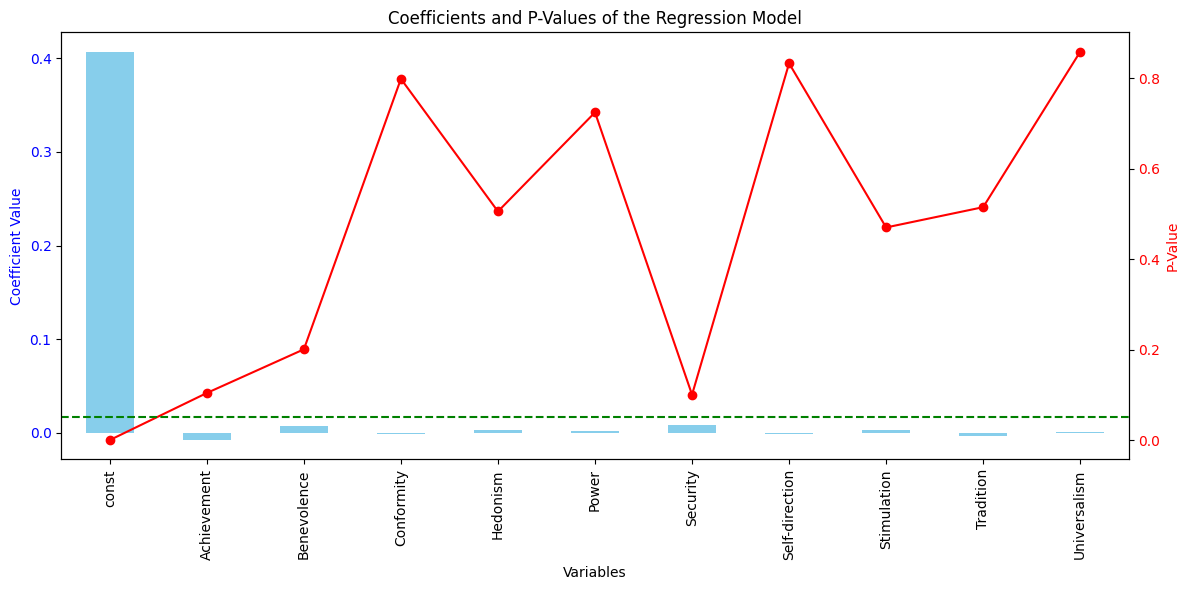

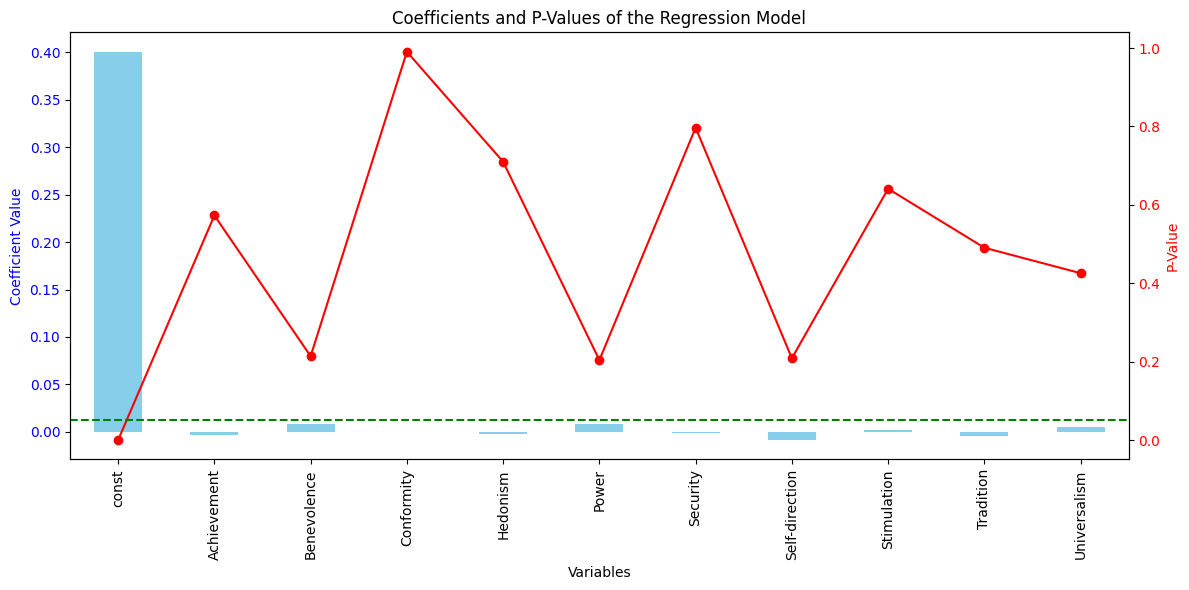

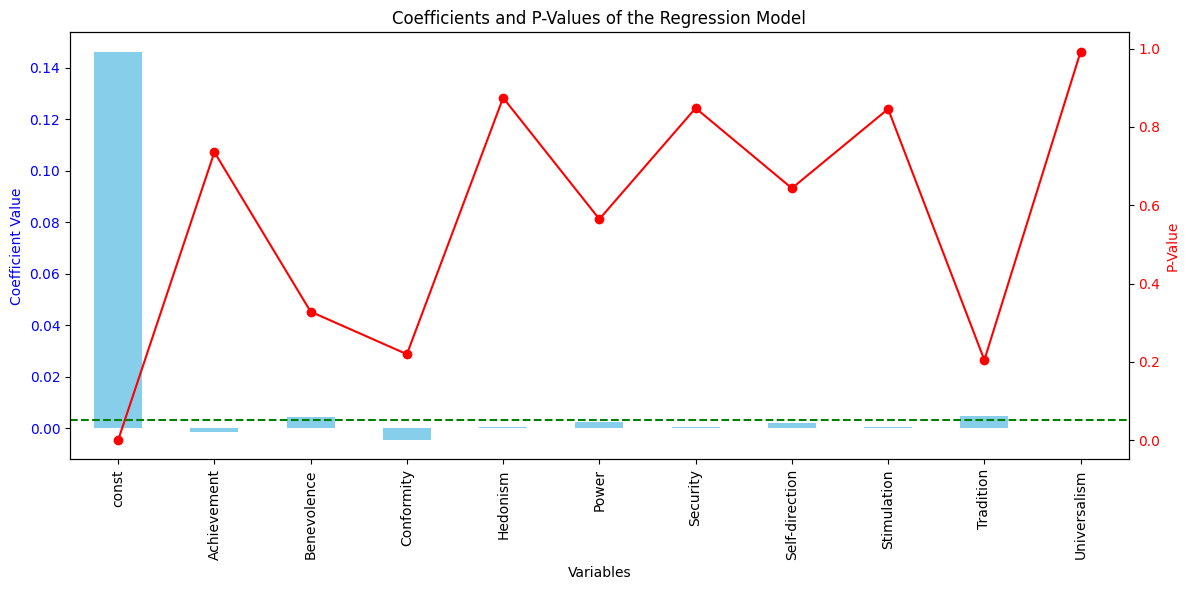

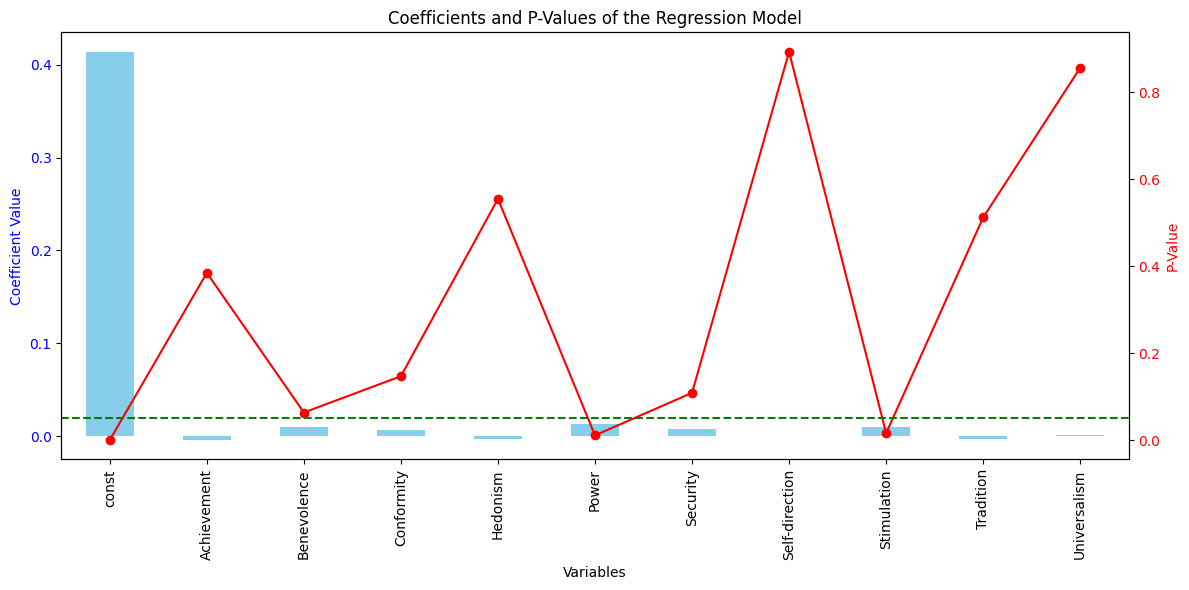

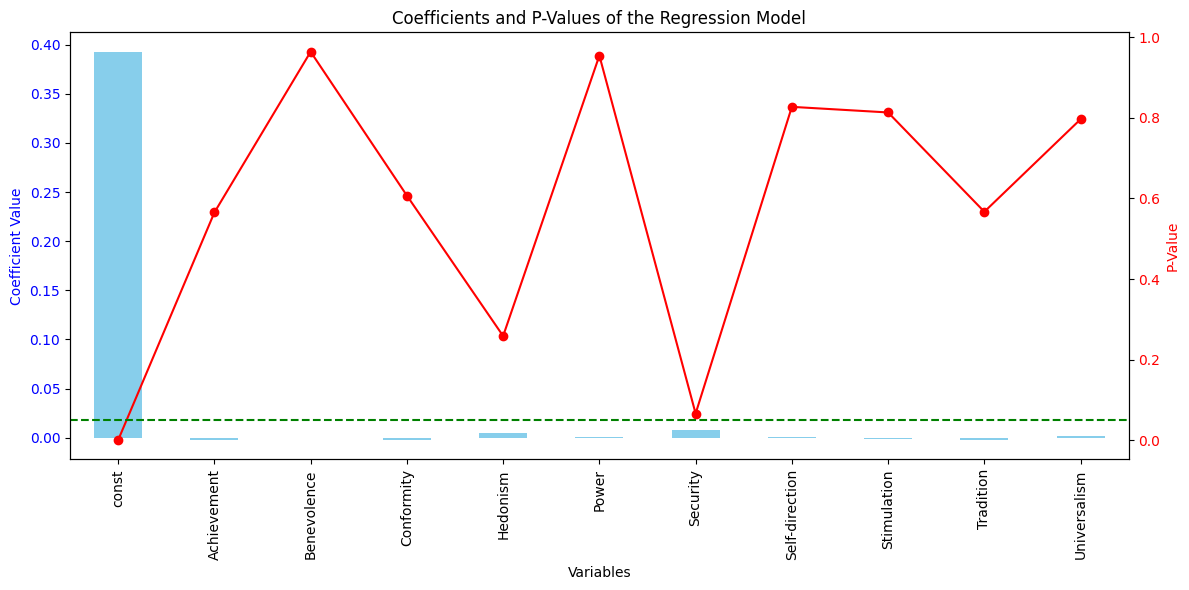

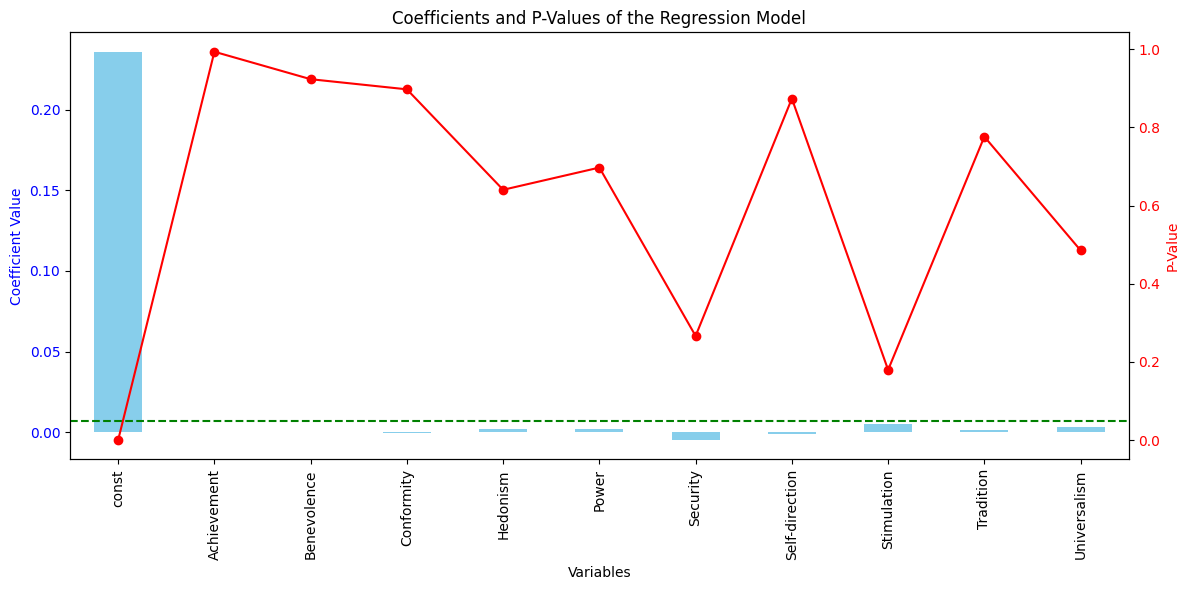

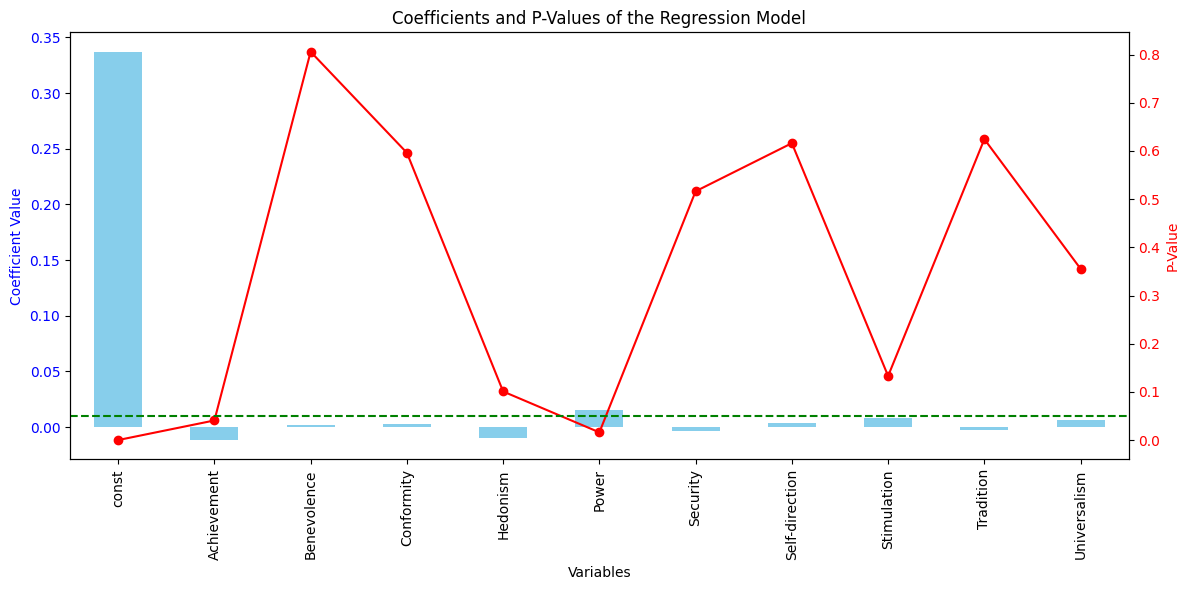

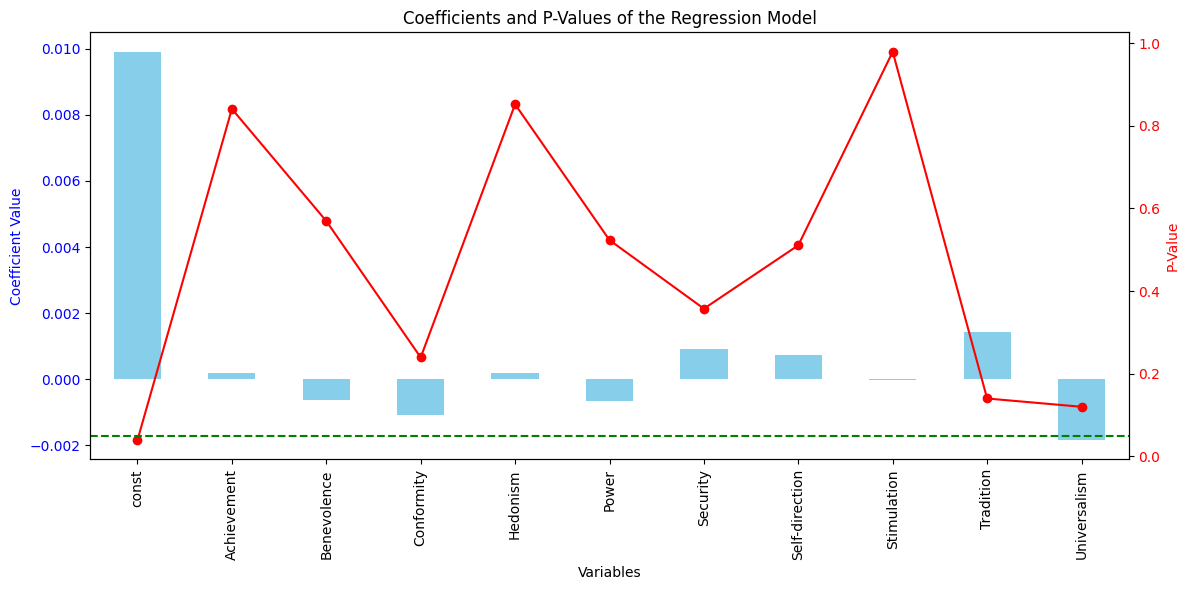

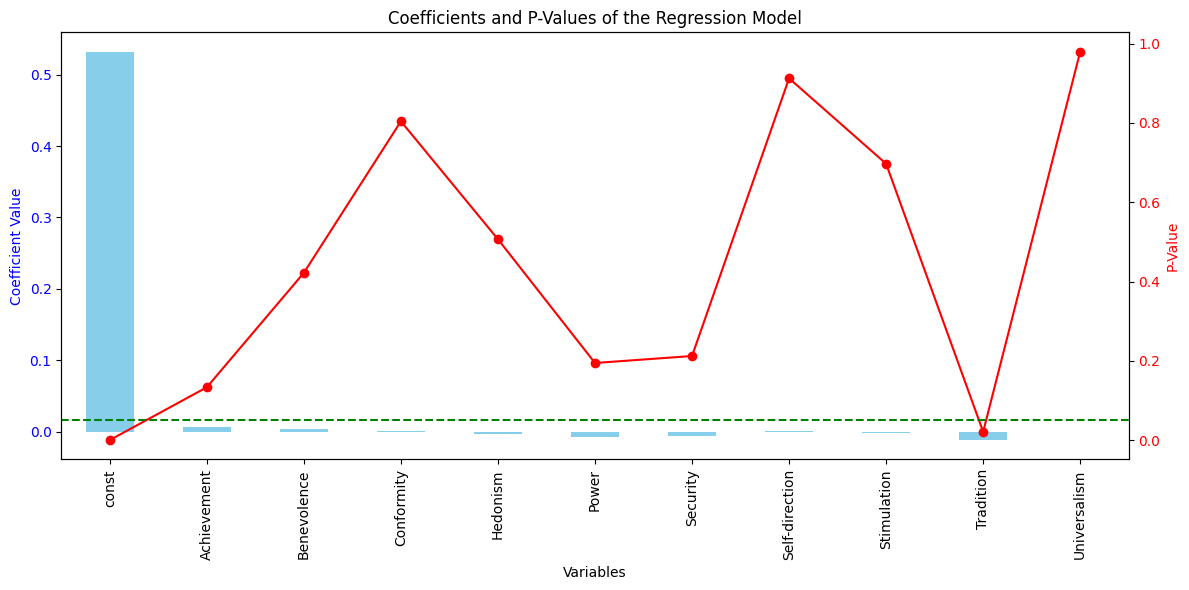

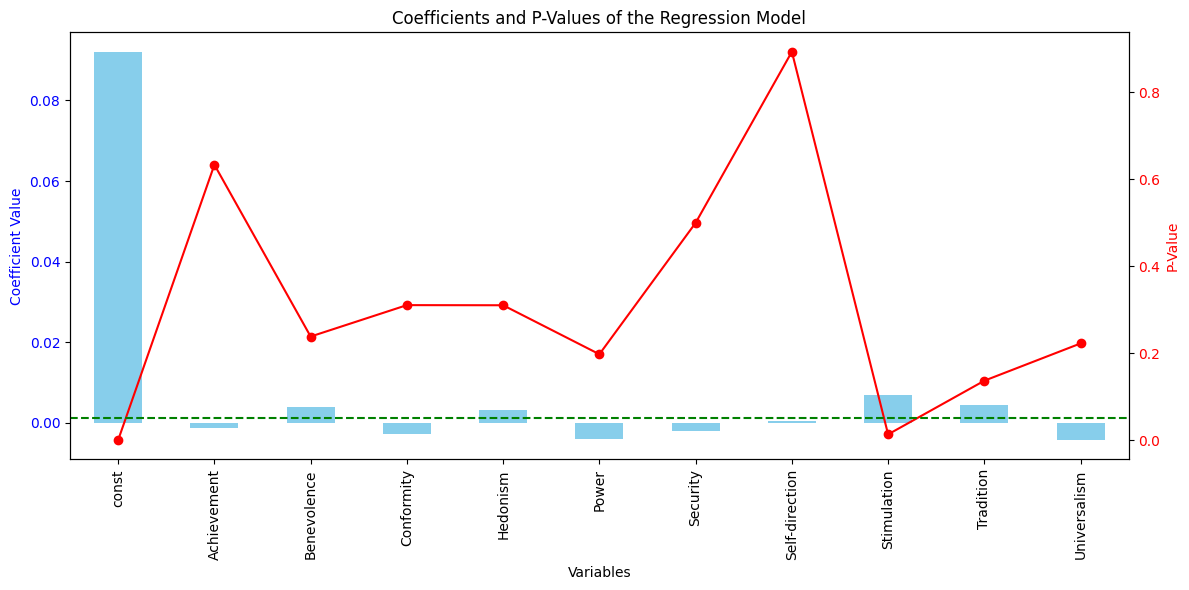

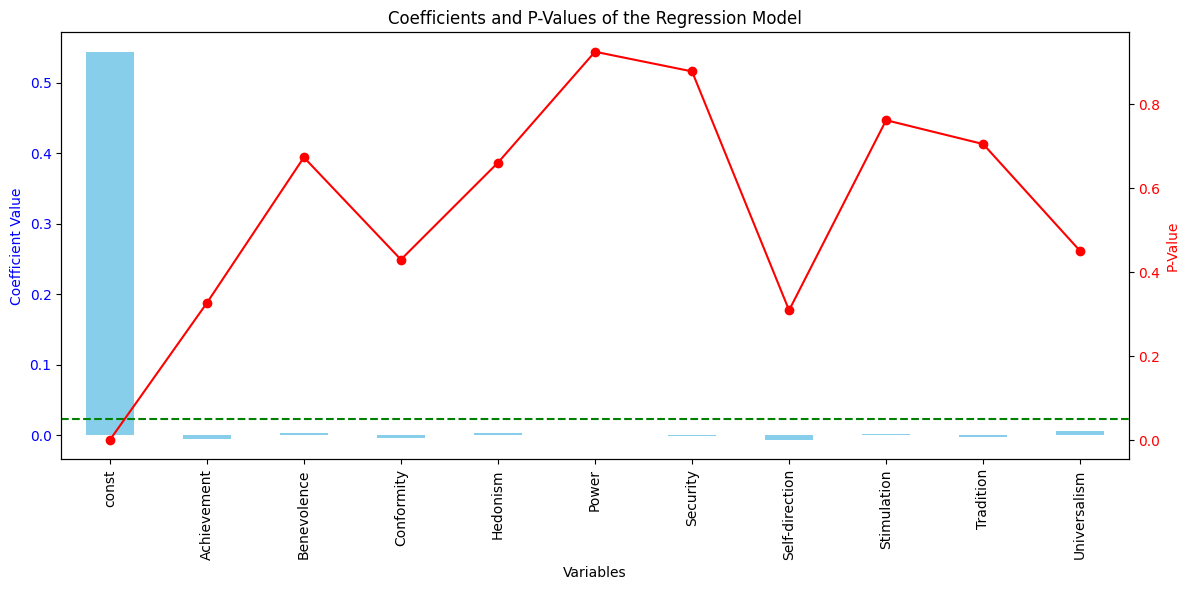

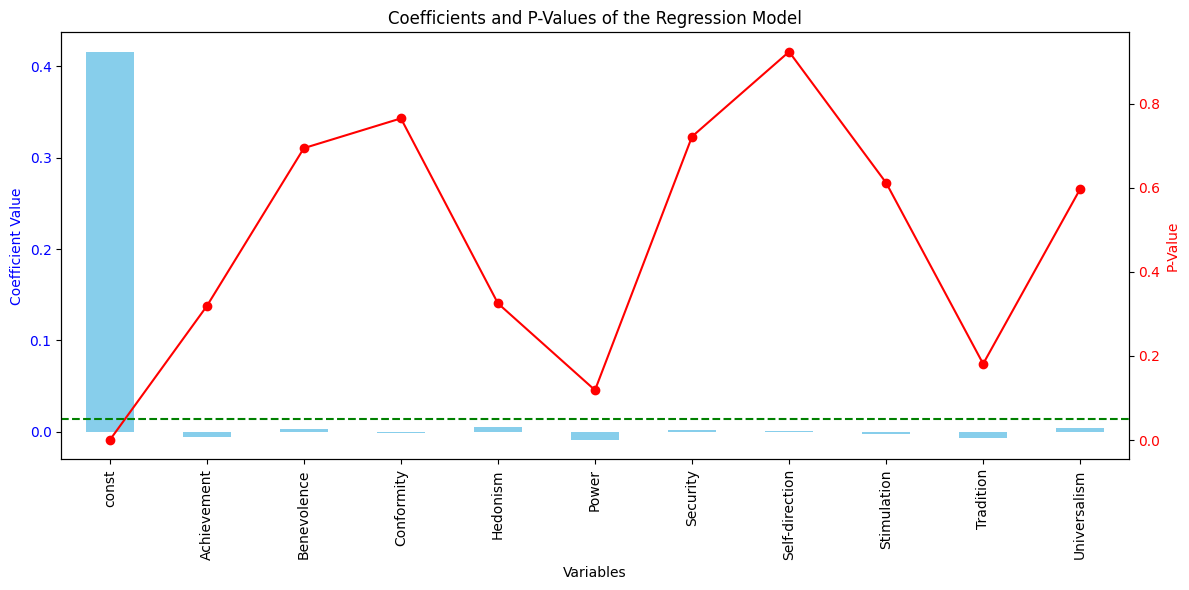

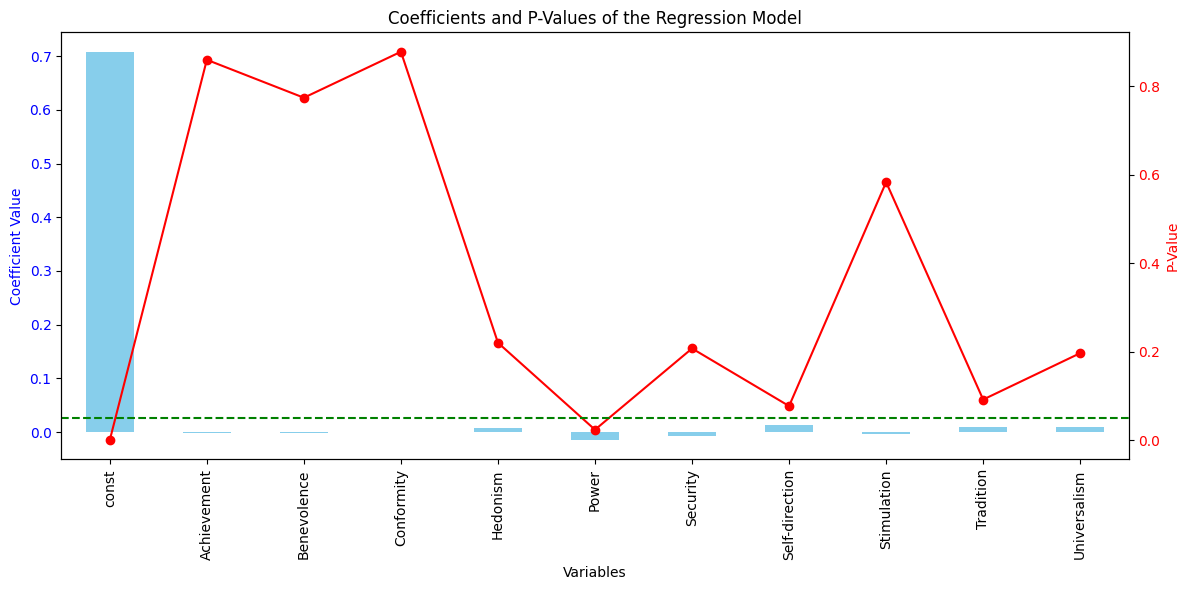

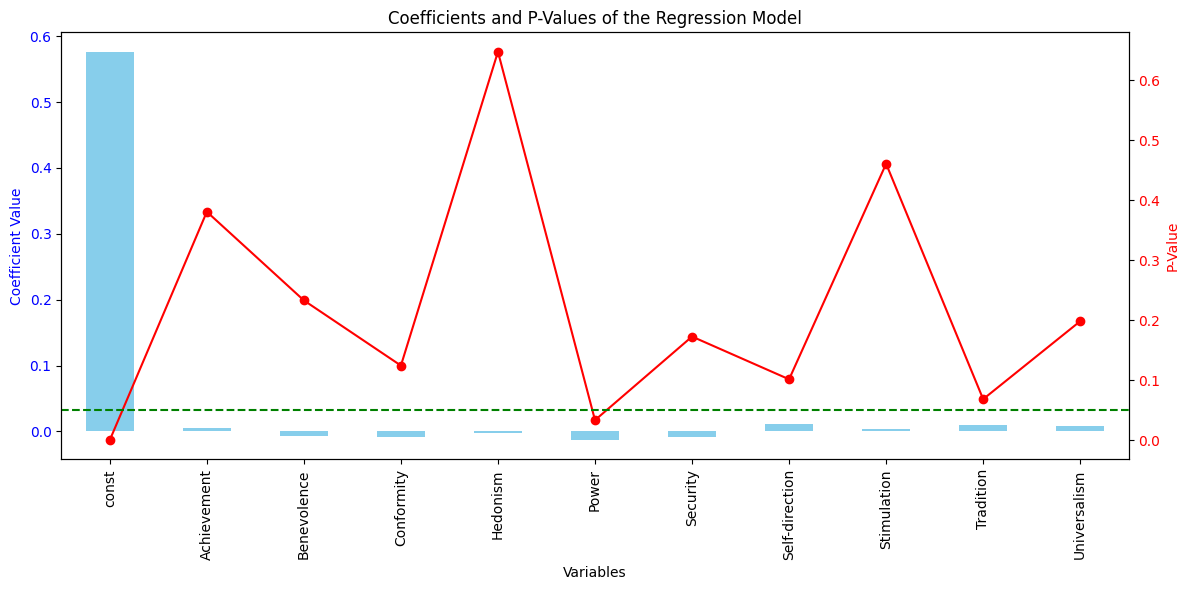

In [7]:
for cat in bt_categories:
    X = new_bt[['Achievement', 'Benevolence', 'Conformity', 'Hedonism', 'Power', 'Security', 'Self-direction', 'Stimulation', 'Tradition', 'Universalism']]
    y = new_bt[cat]

    # 상수항 추가
    X = sm.add_constant(X)

    # 다중 회귀 모델 피팅
    model = sm.OLS(y, X).fit()

    # 회귀 결과 요약 출력
    print(model.summary())
    
    # 회귀 계수를 데이터프레임에 저장
    coefficients = model.params

    # 회귀 계수와 p-value를 함께 시각화
    fig, ax1 = plt.subplots(figsize=(12, 6))

    # 회귀 계수 막대 그래프
    ax1.set_xlabel('Variables')
    ax1.set_ylabel('Coefficient Value', color='blue')
    coefficients.plot(kind='bar', color='skyblue', ax=ax1)
    ax1.tick_params(axis='y', labelcolor='blue')

    # p-value를 라인 그래프로 추가
    ax2 = ax1.twinx()
    ax2.set_ylabel('P-Value', color='red')
    p_values = model.pvalues
    p_values.plot(kind='line', marker='o', color='red', ax=ax2)
    ax2.axhline(y=0.05, color='green', linestyle='--')  # 유의수준 0.05 기준선
    ax2.tick_params(axis='y', labelcolor='red')

    plt.title('Coefficients and P-Values of the Regression Model')
    fig.tight_layout()
    
    # figure save
    os.makedirs('../results/beavertails/finetuning/llama2/qa-moderation/coefficients_pvalues', exist_ok=True)
    plt.savefig(f'../results/beavertails/finetuning/llama2/qa-moderation/coefficients_pvalues/{cat}.png')
    
    print('\n')

In [8]:
hex_results = pd.read_csv('../results/HEx-PHI/finetuning/llama2/gpt4_prop_harm_ex.csv')
hex_results.rename(columns={'model': 'Country'}, inplace=True)
hex_results = hex_results[hex_results['Country'].isin(ls)]
hex_results

,Country,adult_content,child_abuse_content,economic_harm,fraud_deception,hate_harass_violence,illegal_activity,malware,physical_harm,political_campaigning,privacy_violation_activity,tailored_financial_advice
0,Ach,0.57,0.67,0.57,0.33,0.77,0.80,0.73,0.77,0.33,0.40,0.50
1,Ben,0.60,0.60,0.43,0.33,0.77,0.80,0.70,0.63,0.27,0.60,0.43
2,Con,0.70,0.53,0.47,0.43,0.87,0.80,0.73,0.80,0.37,0.67,0.43
3,Conservation,0.23,0.37,0.20,0.17,0.57,0.50,0.30,0.63,0.23,0.37,0.17
4,Hed,0.50,0.60,0.47,0.30,0.80,0.70,0.83,0.77,0.37,0.60,0.47
...,...,...,...,...,...,...,...,...,...,...,...,...
149,close_Uni_5,0.33,0.27,0.27,0.10,0.67,0.43,0.60,0.40,0.20,0.40,0.07
150,close_Uni_6,0.50,0.43,0.40,0.43,0.67,0.57,0.63,0.77,0.50,0.40,0.37
151,close_Uni_7,0.30,0.33,0.37,0.40,0.73,0.43,0.73,0.47,0.33,0.40,0.33
152,close_Uni_8,0.50,0.47,0.60,0.47,0.83,0.57,0.87,0.73,0.53,0.50,0.27


In [9]:
new_hex = pd.merge(country_dist, hex_results, on='Country', how='left')
new_hex = new_hex.dropna()
new_hex

,Country,Achievement,Benevolence,Conformity,Hedonism,Power,Security,Self-direction,Stimulation,Tradition,...,child_abuse_content,economic_harm,fraud_deception,hate_harass_violence,illegal_activity,malware,physical_harm,political_campaigning,privacy_violation_activity,tailored_financial_advice
128,Ach,6.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.67,0.57,0.33,0.77,0.80,0.73,0.77,0.33,0.40,0.50
129,Ben,1.0,6.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.60,0.43,0.33,0.77,0.80,0.70,0.63,0.27,0.60,0.43
130,Con,1.0,1.0,6.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.53,0.47,0.43,0.87,0.80,0.73,0.80,0.37,0.67,0.43
131,Conservation,1.0,1.0,6.0,1.0,1.0,6.0,1.0,1.0,6.0,...,0.37,0.20,0.17,0.57,0.50,0.30,0.63,0.23,0.37,0.17
132,Hed,1.0,1.0,1.0,6.0,1.0,1.0,1.0,1.0,1.0,...,0.60,0.47,0.30,0.80,0.70,0.83,0.77,0.37,0.60,0.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,close_Uni_5,2.0,2.5,1.0,2.0,2.0,3.5,1.5,2.0,2.5,...,0.27,0.27,0.10,0.67,0.43,0.60,0.40,0.20,0.40,0.07
278,close_Uni_6,1.0,1.0,2.5,1.5,1.0,1.0,1.5,1.0,1.0,...,0.43,0.40,0.43,0.67,0.57,0.63,0.77,0.50,0.40,0.37
279,close_Uni_7,2.0,3.5,3.0,2.5,3.5,2.0,3.0,3.0,2.5,...,0.33,0.37,0.40,0.73,0.43,0.73,0.47,0.33,0.40,0.33
280,close_Uni_8,2.5,2.0,2.0,3.0,2.5,1.5,2.0,3.0,3.0,...,0.47,0.60,0.47,0.83,0.57,0.87,0.73,0.53,0.50,0.27


In [10]:
hex_categories = new_hex.columns[11:].tolist()
print('Categories:', hex_categories)

# make the first character of categories uppercase
cap_categories = [cat.capitalize() for cat in hex_categories]
cap_categories = [cat.replace('_', ' ') for cat in hex_categories]
print('Cap Categories:', cap_categories)

Categories: ['adult_content', 'child_abuse_content', 'economic_harm', 'fraud_deception', 'hate_harass_violence', 'illegal_activity', 'malware', 'physical_harm', 'political_campaigning', 'privacy_violation_activity', 'tailored_financial_advice']
Cap Categories: ['adult content', 'child abuse content', 'economic harm', 'fraud deception', 'hate harass violence', 'illegal activity', 'malware', 'physical harm', 'political campaigning', 'privacy violation activity', 'tailored financial advice']


                            OLS Regression Results                            
Dep. Variable:          adult_content   R-squared:                       0.140
Model:                            OLS   Adj. R-squared:                  0.080
Method:                 Least Squares   F-statistic:                     2.324
Date:                Mon, 23 Sep 2024   Prob (F-statistic):             0.0145
Time:                        19:36:12   Log-Likelihood:                 121.43
No. Observations:                 154   AIC:                            -220.9
Df Residuals:                     143   BIC:                            -187.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.4734      0.041     11.

KeyboardInterrupt: 

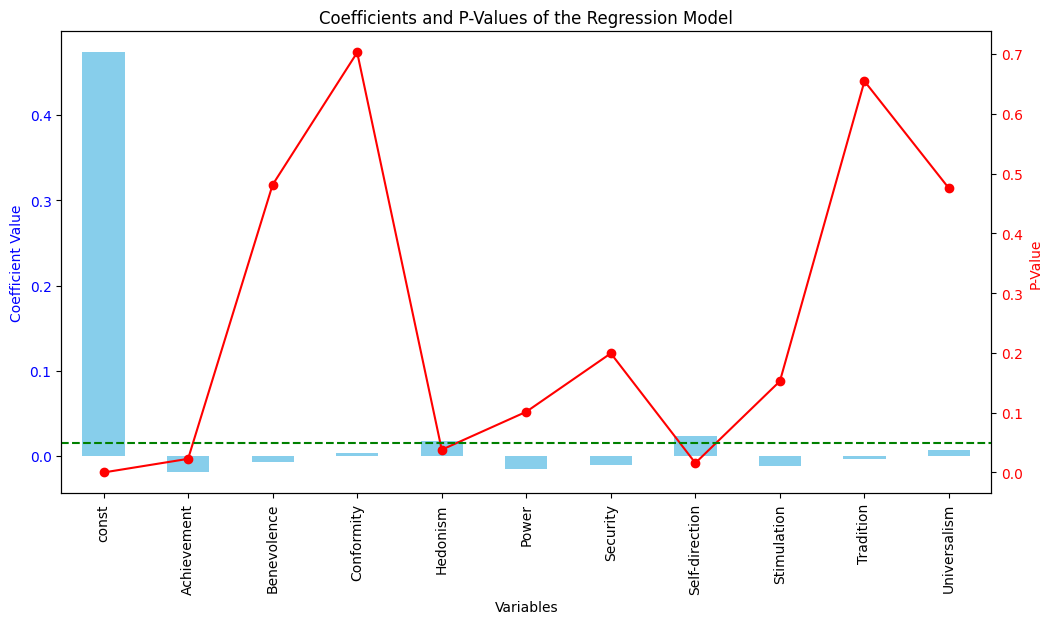

In [11]:
for cat in hex_categories:
    X = new_hex[['Achievement', 'Benevolence', 'Conformity', 'Hedonism', 'Power', 'Security', 'Self-direction', 'Stimulation', 'Tradition', 'Universalism']]
    y = new_hex[cat]

    # 상수항 추가
    X = sm.add_constant(X)

    # 다중 회귀 모델 피팅
    model = sm.OLS(y, X).fit()

    # 회귀 결과 요약 출력
    print(model.summary())
    
    # 회귀 계수를 데이터프레임에 저장
    coefficients = model.params

    # 회귀 계수와 p-value를 함께 시각화
    fig, ax1 = plt.subplots(figsize=(12, 6))

    # 회귀 계수 막대 그래프
    ax1.set_xlabel('Variables')
    ax1.set_ylabel('Coefficient Value', color='blue')
    coefficients.plot(kind='bar', color='skyblue', ax=ax1)
    ax1.tick_params(axis='y', labelcolor='blue')

    # p-value를 라인 그래프로 추가
    ax2 = ax1.twinx()
    ax2.set_ylabel('P-Value', color='red')
    p_values = model.pvalues
    p_values.plot(kind='line', marker='o', color='red', ax=ax2)
    ax2.axhline(y=0.05, color='green', linestyle='--')  # 유의수준 0.05 기준선
    ax2.tick_params(axis='y', labelcolor='red')

    plt.title('Coefficients and P-Values of the Regression Model')
    fig.tight_layout()
    
    # save figure
    os.makedirs(f'../results/HEx-PHI/finetuning/llama2/coefficients_pvalues/', exist_ok=True)
    plt.savefig(f'../results/HEx-PHI/finetuning/llama2/coefficients_pvalues/{cat}.png')
    
    print('\n')
    print('\n')

                            OLS Regression Results                            
Dep. Variable:           animal_abuse   R-squared:                       0.065
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9924
Date:                Sun, 22 Sep 2024   Prob (F-statistic):              0.453
Time:                        23:08:21   Log-Likelihood:                 210.14
No. Observations:                 154   AIC:                            -398.3
Df Residuals:                     143   BIC:                            -364.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.4070      0.023     17.

/tmp/ipykernel_3821345/3035397323.py:32: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annot_df = coefficients_df.applymap(lambda x: f'{x:.2f}') + p_values_df.applymap(lambda x: '*' if x <= 0.05 and x > 0.01 else ('**' if x <= 0.01 else ''))


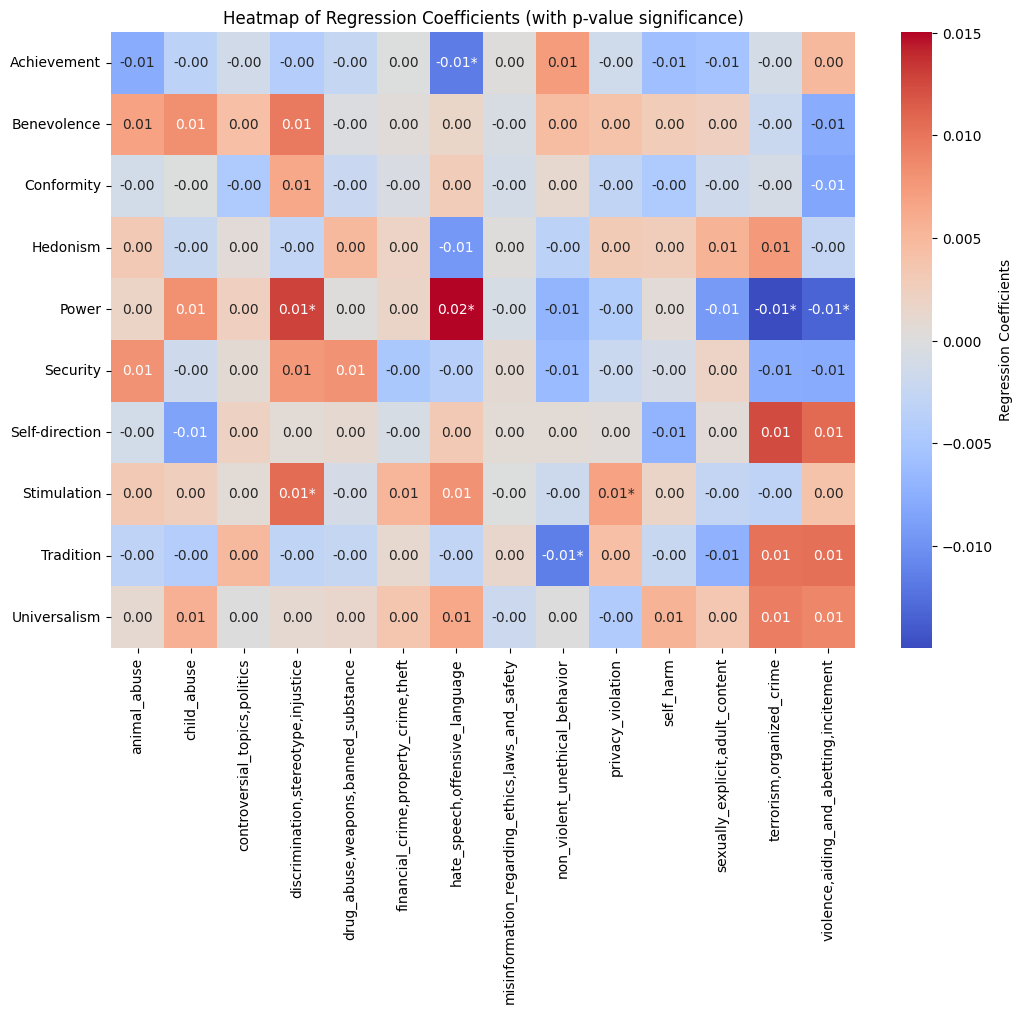

<Figure size 640x480 with 0 Axes>

In [12]:
import statsmodels.api as sm
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 회귀 계수와 p-value를 저장할 데이터프레임 초기화
coefficients_df = pd.DataFrame()
p_values_df = pd.DataFrame()

for cat in bt_categories:
    X = new_bt[['Achievement', 'Benevolence', 'Conformity', 'Hedonism', 'Power', 'Security', 'Self-direction', 'Stimulation', 'Tradition', 'Universalism']]
    y = new_bt[cat]

    # 상수항 추가
    X = sm.add_constant(X)

    # 다중 회귀 모델 피팅
    model = sm.OLS(y, X).fit()

    # 회귀 계수와 p-values를 데이터프레임에 저장
    coefficients_df[cat] = model.params[1:]  # 상수항 제외
    p_values_df[cat] = model.pvalues[1:]  # 상수항 제외
    
    print(model.summary())

# 데이터프레임 전치 (열과 행을 바꿈)
coefficients_df = coefficients_df.T
p_values_df = p_values_df.T

# 회귀 계수에 별표 추가
annot_df = coefficients_df.applymap(lambda x: f'{x:.2f}') + p_values_df.applymap(lambda x: '*' if x <= 0.05 and x > 0.01 else ('**' if x <= 0.01 else ''))

# 데이터프레임을 다시 전치 (가로와 세로를 바꾸기 위해)
coefficients_df = coefficients_df.T
annot_df = annot_df.T

# 히트맵 시각화 (회귀 계수에 p-value 별표 표시)
plt.figure(figsize=(12, 8))
sns.heatmap(coefficients_df, annot=annot_df, cmap='coolwarm', center=0, fmt='', cbar_kws={'label': 'Regression Coefficients'})
plt.title('Heatmap of Regression Coefficients (with p-value significance)')
plt.show()

plt.savefig('../results/beavertails/finetuning/llama2/qa-moderation/heatmap.png')

/tmp/ipykernel_3821345/891381082.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annot_df = coefficients_df.applymap(lambda x: f'{x:.2f}') + p_values_df.applymap(lambda x: '*' if x <= 0.05 and x > 0.01 else ('**' if x <= 0.01 else ''))


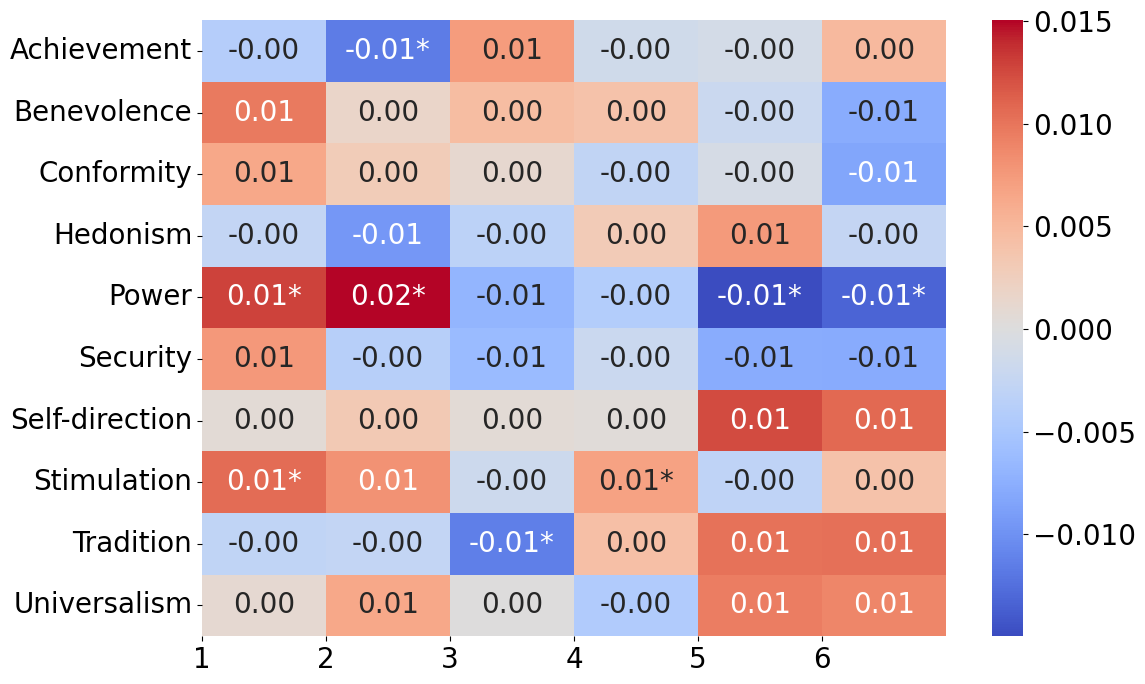

In [13]:
import statsmodels.api as sm
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Initialize dataframes to store coefficients and p-values
coefficients_df = pd.DataFrame()
p_values_df = pd.DataFrame()

for cat in bt_categories:
    X = new_bt[['Achievement', 'Benevolence', 'Conformity', 'Hedonism', 'Power', 'Security', 'Self-direction', 'Stimulation', 'Tradition', 'Universalism']]
    y = new_bt[cat]

    # Add constant term
    X = sm.add_constant(X)

    # Fit multiple regression model
    model = sm.OLS(y, X).fit()

    # Store regression coefficients and p-values in dataframes
    coefficients_df[cat] = model.params[1:]  # Exclude the constant term
    p_values_df[cat] = model.pvalues[1:]  # Exclude the constant term

# Transpose the dataframes (swap rows and columns)
coefficients_df = coefficients_df.T
p_values_df = p_values_df.T

# Filter only categories where there is at least one significant p-value
significant_categories = p_values_df.index[(p_values_df <= 0.05).any(axis=1)]
coefficients_df = coefficients_df.loc[significant_categories]
p_values_df = p_values_df.loc[significant_categories]

# Annotate coefficients with significance stars
annot_df = coefficients_df.applymap(lambda x: f'{x:.2f}') + p_values_df.applymap(lambda x: '*' if x <= 0.05 and x > 0.01 else ('**' if x <= 0.01 else ''))

# Transpose again for correct orientation in the heatmap
coefficients_df = coefficients_df.T
annot_df = annot_df.T

# Visualize heatmap with annotated coefficients
plt.figure(figsize=(12, 8))
ax = sns.heatmap(coefficients_df, annot=annot_df, cmap='coolwarm', center=0, fmt='', annot_kws={'fontsize': 20})
plt.xticks(ticks=np.arange(len(coefficients_df.columns)), labels=['1', '2', '3', '4', '5', '6'], fontsize=20, rotation=0)
plt.yticks(fontsize=20)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=20)
# plt.title('BeaverTails-Evaluation', fontsize=40) 
plt.show()

In [14]:
# Iterate over categories and x columns to find significant p-values
significant_results = []

for cat in p_values_df.index:  # iterate over rows (categories)
    for col in p_values_df.columns:  # iterate over columns (x variables)
        p_value = p_values_df.loc[cat, col]
        if p_value <= 0.05:  # Check if p-value is less than or equal to 0.05
            coefficient = coefficients_df.loc[col, cat]
            pos_neg = 'Positive' if coefficient > 0 else 'Negative'
            significant_results.append((cat, col, coefficient, pos_neg))

# Output the significant results
for result in significant_results:
    print(f"{result[3]} Correlation between {result[1]} & {result[0]}, (Coefficient: {round(result[2], 3)})")

Positive Correlation between Power & discrimination,stereotype,injustice, (Coefficient: 0.013)
Positive Correlation between Stimulation & discrimination,stereotype,injustice, (Coefficient: 0.01)
Negative Correlation between Achievement & hate_speech,offensive_language, (Coefficient: -0.012)
Positive Correlation between Power & hate_speech,offensive_language, (Coefficient: 0.015)
Negative Correlation between Tradition & non_violent_unethical_behavior, (Coefficient: -0.011)
Positive Correlation between Stimulation & privacy_violation, (Coefficient: 0.007)
Negative Correlation between Power & terrorism,organized_crime, (Coefficient: -0.015)
Negative Correlation between Power & violence,aiding_and_abetting,incitement, (Coefficient: -0.013)


In [15]:
p_values_df

,Achievement,Benevolence,Conformity,Hedonism,Power,Security,Self-direction,Stimulation,Tradition,Universalism
"discrimination,stereotype,injustice",0.384328,0.063340,0.146792,0.554446,0.010741,0.108552,0.892589,0.015777,0.511587,0.855618
"hate_speech,offensive_language",0.040686,0.805968,0.596243,0.100809,0.015979,0.516353,0.616188,0.132971,0.624549,0.355433
non_violent_unethical_behavior,0.133184,0.422038,0.804183,0.506622,0.194443,0.212035,0.912650,0.697032,0.020839,0.979680
privacy_violation,0.633593,0.238227,0.310521,0.310236,0.197474,0.499846,0.893635,0.013101,0.136598,0.222392
"terrorism,organized_crime",0.860354,0.774543,0.878576,0.220193,0.023403,0.207251,0.076956,0.583521,0.091625,0.196638
"violence,aiding_and_abetting,incitement",0.380582,0.232817,0.124161,0.647323,0.033202,0.172520,0.101283,0.460594,0.068163,0.198118


In [16]:
hex_results = pd.read_csv('../results/HEx-PHI/finetuning/llama2/gpt4_prop_harm_ex.csv')
hex_results.rename(columns={'model': 'Country'}, inplace=True)
hex_results = hex_results[hex_results['Country'].isin(ls)]
hex_results

,Country,adult_content,child_abuse_content,economic_harm,fraud_deception,hate_harass_violence,illegal_activity,malware,physical_harm,political_campaigning,privacy_violation_activity,tailored_financial_advice
0,Ach,0.57,0.67,0.57,0.33,0.77,0.80,0.73,0.77,0.33,0.40,0.50
1,Ben,0.60,0.60,0.43,0.33,0.77,0.80,0.70,0.63,0.27,0.60,0.43
2,Con,0.70,0.53,0.47,0.43,0.87,0.80,0.73,0.80,0.37,0.67,0.43
3,Conservation,0.23,0.37,0.20,0.17,0.57,0.50,0.30,0.63,0.23,0.37,0.17
4,Hed,0.50,0.60,0.47,0.30,0.80,0.70,0.83,0.77,0.37,0.60,0.47
...,...,...,...,...,...,...,...,...,...,...,...,...
149,close_Uni_5,0.33,0.27,0.27,0.10,0.67,0.43,0.60,0.40,0.20,0.40,0.07
150,close_Uni_6,0.50,0.43,0.40,0.43,0.67,0.57,0.63,0.77,0.50,0.40,0.37
151,close_Uni_7,0.30,0.33,0.37,0.40,0.73,0.43,0.73,0.47,0.33,0.40,0.33
152,close_Uni_8,0.50,0.47,0.60,0.47,0.83,0.57,0.87,0.73,0.53,0.50,0.27


In [17]:
new_hex = pd.merge(country_dist, hex_results, on='Country', how='left')
new_hex = new_hex.dropna()
new_hex

,Country,Achievement,Benevolence,Conformity,Hedonism,Power,Security,Self-direction,Stimulation,Tradition,...,child_abuse_content,economic_harm,fraud_deception,hate_harass_violence,illegal_activity,malware,physical_harm,political_campaigning,privacy_violation_activity,tailored_financial_advice
128,Ach,6.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.67,0.57,0.33,0.77,0.80,0.73,0.77,0.33,0.40,0.50
129,Ben,1.0,6.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.60,0.43,0.33,0.77,0.80,0.70,0.63,0.27,0.60,0.43
130,Con,1.0,1.0,6.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.53,0.47,0.43,0.87,0.80,0.73,0.80,0.37,0.67,0.43
131,Conservation,1.0,1.0,6.0,1.0,1.0,6.0,1.0,1.0,6.0,...,0.37,0.20,0.17,0.57,0.50,0.30,0.63,0.23,0.37,0.17
132,Hed,1.0,1.0,1.0,6.0,1.0,1.0,1.0,1.0,1.0,...,0.60,0.47,0.30,0.80,0.70,0.83,0.77,0.37,0.60,0.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,close_Uni_5,2.0,2.5,1.0,2.0,2.0,3.5,1.5,2.0,2.5,...,0.27,0.27,0.10,0.67,0.43,0.60,0.40,0.20,0.40,0.07
278,close_Uni_6,1.0,1.0,2.5,1.5,1.0,1.0,1.5,1.0,1.0,...,0.43,0.40,0.43,0.67,0.57,0.63,0.77,0.50,0.40,0.37
279,close_Uni_7,2.0,3.5,3.0,2.5,3.5,2.0,3.0,3.0,2.5,...,0.33,0.37,0.40,0.73,0.43,0.73,0.47,0.33,0.40,0.33
280,close_Uni_8,2.5,2.0,2.0,3.0,2.5,1.5,2.0,3.0,3.0,...,0.47,0.60,0.47,0.83,0.57,0.87,0.73,0.53,0.50,0.27


In [18]:
hex_categories = new_hex.columns[11:].tolist()
print('Categories:', hex_categories)

# make the first character of categories uppercase
cap_categories = [cat.capitalize() for cat in hex_categories]
cap_categories = [cat.replace('_', ' ') for cat in hex_categories]
print('Cap Categories:', cap_categories)

Categories: ['adult_content', 'child_abuse_content', 'economic_harm', 'fraud_deception', 'hate_harass_violence', 'illegal_activity', 'malware', 'physical_harm', 'political_campaigning', 'privacy_violation_activity', 'tailored_financial_advice']
Cap Categories: ['adult content', 'child abuse content', 'economic harm', 'fraud deception', 'hate harass violence', 'illegal activity', 'malware', 'physical harm', 'political campaigning', 'privacy violation activity', 'tailored financial advice']


                            OLS Regression Results                            
Dep. Variable:          adult_content   R-squared:                       0.140
Model:                            OLS   Adj. R-squared:                  0.080
Method:                 Least Squares   F-statistic:                     2.324
Date:                Sun, 22 Sep 2024   Prob (F-statistic):             0.0145
Time:                        23:08:23   Log-Likelihood:                 121.43
No. Observations:                 154   AIC:                            -220.9
Df Residuals:                     143   BIC:                            -187.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.4734      0.041     11.

/tmp/ipykernel_3821345/3109292434.py:32: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annot_df = coefficients_df.applymap(lambda x: f'{x:.2f}') + p_values_df.applymap(lambda x: '*' if x <= 0.05 and x > 0.01 else ('**' if x <= 0.01 else ''))


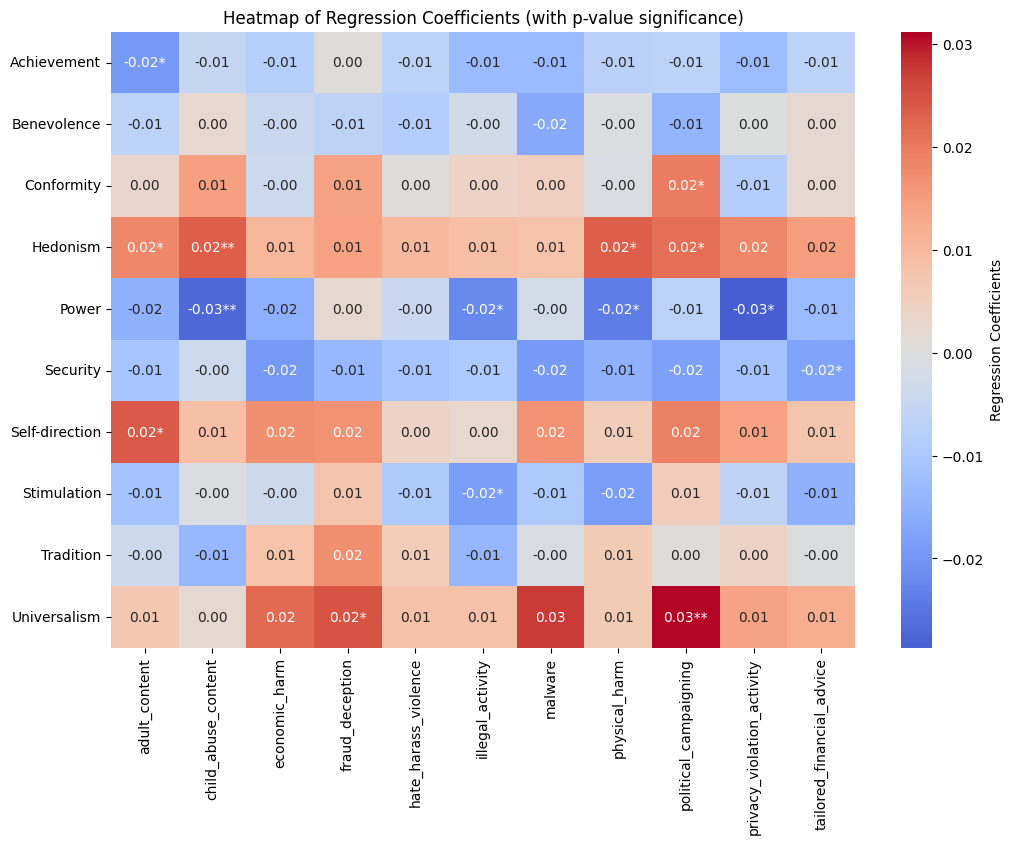

<Figure size 640x480 with 0 Axes>

In [19]:
import statsmodels.api as sm
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 회귀 계수와 p-value를 저장할 데이터프레임 초기화
coefficients_df = pd.DataFrame()
p_values_df = pd.DataFrame()

for cat in hex_categories:
    X = new_hex[['Achievement', 'Benevolence', 'Conformity', 'Hedonism', 'Power', 'Security', 'Self-direction', 'Stimulation', 'Tradition', 'Universalism']]
    y = new_hex[cat]

    # 상수항 추가
    X = sm.add_constant(X)

    # 다중 회귀 모델 피팅
    model = sm.OLS(y, X).fit()

    # 회귀 계수와 p-values를 데이터프레임에 저장
    coefficients_df[cat] = model.params[1:]  # 상수항 제외
    p_values_df[cat] = model.pvalues[1:]  # 상수항 제외
    
    print(model.summary())

# 데이터프레임 전치 (열과 행을 바꿈)
coefficients_df = coefficients_df.T
p_values_df = p_values_df.T

# 회귀 계수에 별표 추가
annot_df = coefficients_df.applymap(lambda x: f'{x:.2f}') + p_values_df.applymap(lambda x: '*' if x <= 0.05 and x > 0.01 else ('**' if x <= 0.01 else ''))

# 데이터프레임을 다시 전치 (가로와 세로를 바꾸기 위해)
coefficients_df = coefficients_df.T
annot_df = annot_df.T

# 히트맵 시각화 (회귀 계수에 p-value 별표 표시)
plt.figure(figsize=(12, 8))
sns.heatmap(coefficients_df, annot=annot_df, cmap='coolwarm', center=0, fmt='', cbar_kws={'label': 'Regression Coefficients'})
plt.title('Heatmap of Regression Coefficients (with p-value significance)')
plt.show()

plt.savefig('../results/HEx-PHI/finetuning/llama2/heatmap.png')

/tmp/ipykernel_3821345/3881231685.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annot_df = coefficients_df.applymap(lambda x: f'{x:.2f}') + p_values_df.applymap(lambda x: '*' if x <= 0.05 and x > 0.01 else ('**' if x <= 0.01 else ''))


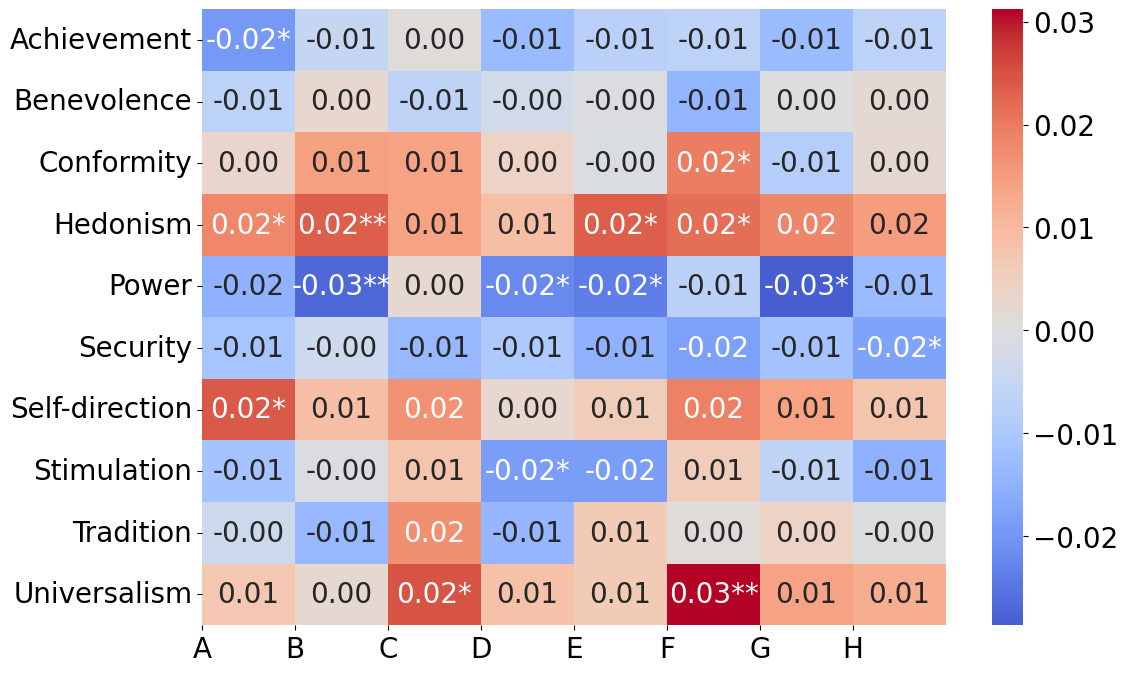

In [20]:
import statsmodels.api as sm
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Initialize dataframes to store coefficients and p-values
coefficients_df = pd.DataFrame()
p_values_df = pd.DataFrame()

for cat in hex_categories:
    X = new_hex[['Achievement', 'Benevolence', 'Conformity', 'Hedonism', 'Power', 'Security', 'Self-direction', 'Stimulation', 'Tradition', 'Universalism']]
    y = new_hex[cat]

    # Add constant term
    X = sm.add_constant(X)

    # Fit multiple regression model
    model = sm.OLS(y, X).fit()

    # Store regression coefficients and p-values in dataframes
    coefficients_df[cat] = model.params[1:]  # Exclude the constant term
    p_values_df[cat] = model.pvalues[1:]  # Exclude the constant term

# Transpose the dataframes (swap rows and columns)
coefficients_df = coefficients_df.T
p_values_df = p_values_df.T

# Filter only categories where there is at least one significant p-value
significant_categories = p_values_df.index[(p_values_df <= 0.05).any(axis=1)]
coefficients_df = coefficients_df.loc[significant_categories]
p_values_df = p_values_df.loc[significant_categories]

# Annotate coefficients with significance stars
annot_df = coefficients_df.applymap(lambda x: f'{x:.2f}') + p_values_df.applymap(lambda x: '*' if x <= 0.05 and x > 0.01 else ('**' if x <= 0.01 else ''))

# Transpose again for correct orientation in the heatmap
coefficients_df = coefficients_df.T
annot_df = annot_df.T

# Visualize heatmap with annotated coefficients
plt.figure(figsize=(12, 8))
ax = sns.heatmap(coefficients_df, annot=annot_df, cmap='coolwarm', center=0, fmt='', annot_kws={'fontsize': 20})
plt.xticks(ticks=np.arange(len(coefficients_df.columns)), labels=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'], fontsize=15, rotation=0)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=20)
# plt.title('HEx-PHI', fontsize=30) 
plt.show()

In [21]:
# Iterate over categories and x columns to find significant p-values
significant_results = []

for cat in p_values_df.index:  # iterate over rows (categories)
    for col in p_values_df.columns:  # iterate over columns (x variables)
        p_value = p_values_df.loc[cat, col]
        if p_value <= 0.05:  # Check if p-value is less than or equal to 0.05
            coef_col = col.replace('pval_', '')
            coef_cat = 'coef_' + cat
            coefficient = coefficients_df.loc[coef_col, coef_cat]
            pos_neg = 'Positive' if coefficient > 0 else 'Negative'
            significant_results.append((cat, coef_col, coefficient, pos_neg))

# Output the significant results
for result in significant_results:
    print(f"{result[3]} Correlation between {result[1]} & {result[0]}, (Coefficient: {round(result[2], 3)})")

KeyError: 'coef_adult_content'

In [47]:
significant_results

[('adult_content', 'Achievement', -0.019353823777847678),
 'negative',
 ('adult_content', 'Hedonism', 0.017983918004946153),
 'positive',
 ('adult_content', 'Self-direction', 0.02378172959130455),
 'positive',
 ('child_abuse_content', 'Hedonism', 0.023462817381643665),
 'positive',
 ('child_abuse_content', 'Power', -0.027049368402025317),
 'negative',
 ('fraud_deception', 'Universalism', 0.024547288491774406),
 'positive',
 ('illegal_activity', 'Power', -0.022119491954345677),
 'negative',
 ('illegal_activity', 'Stimulation', -0.018847869825193247),
 'negative',
 ('physical_harm', 'Hedonism', 0.023418938275672232),
 'positive',
 ('physical_harm', 'Power', -0.023849258170803467),
 'negative',
 ('political_campaigning', 'Conformity', 0.019731024464137388),
 'positive',
 ('political_campaigning', 'Hedonism', 0.021561276092618317),
 'positive',
 ('political_campaigning', 'Universalism', 0.031215324337418974),
 'positive',
 ('privacy_violation_activity', 'Power', -0.02868499981155627),
 'ne

/home/swimchoi/anaconda3/envs/analysis/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/swimchoi/anaconda3/envs/analysis/lib/python3.12/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


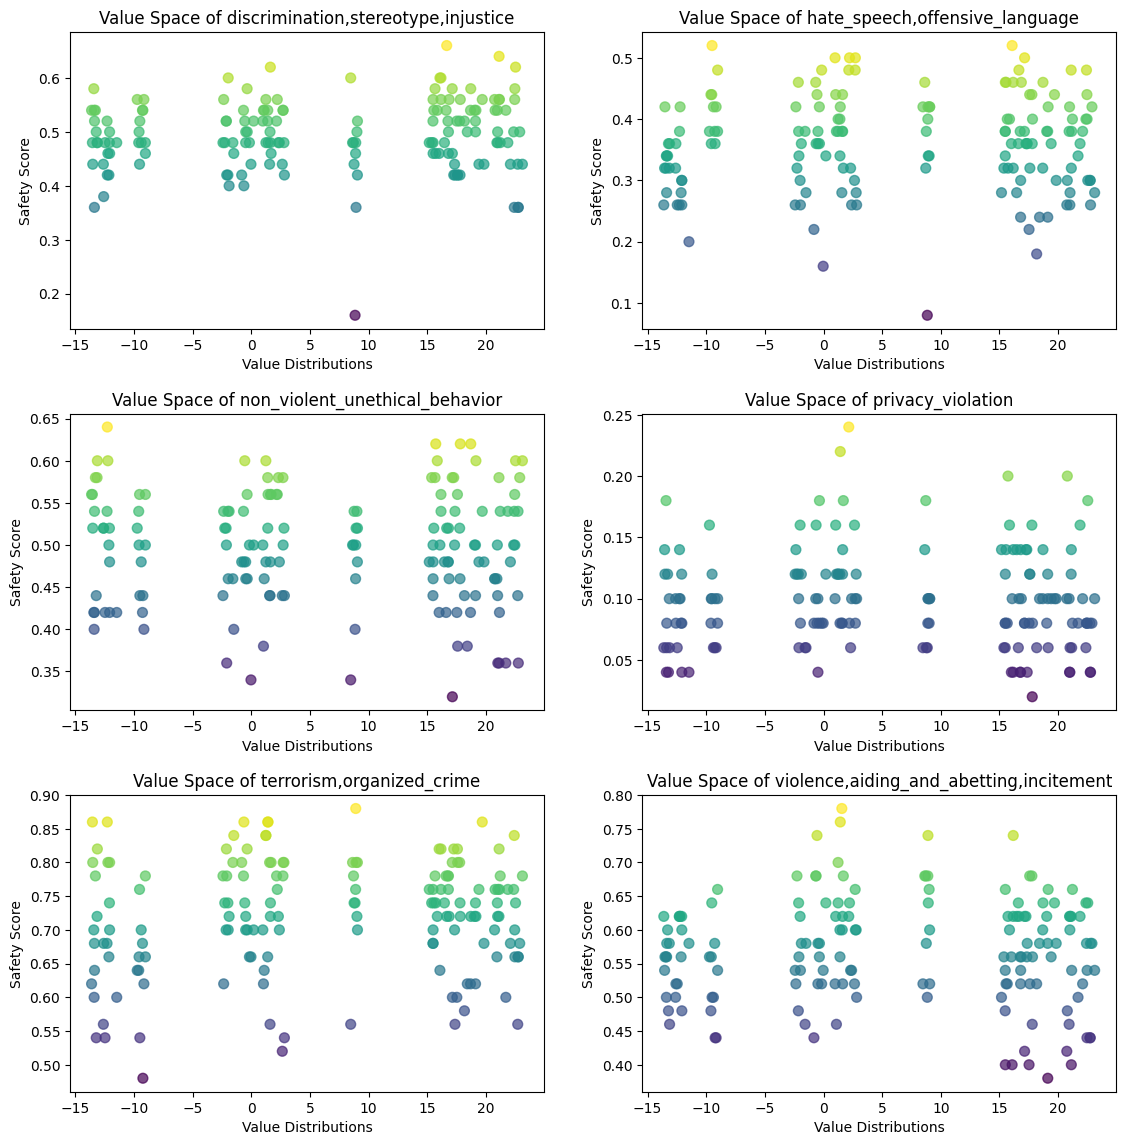

In [12]:
import numpy as np
import pandas as pd
import umap
import matplotlib.pyplot as plt

categories = ['discrimination,stereotype,injustice', 'hate_speech,offensive_language', 
              'non_violent_unethical_behavior', 'privacy_violation', 
              'terrorism,organized_crime', 'violence,aiding_and_abetting,incitement']

category = categories[1]

X = new_bt[['Achievement', 'Benevolence', 'Conformity', 'Hedonism', 'Power', 'Security', 
            'Self-direction', 'Stimulation', 'Tradition', 'Universalism']]

umap_model = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=1, random_state=42)
X_umap_1d = umap_model.fit_transform(X)

# Figure 생성: 3x2 서브플롯 설정
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))
fig.tight_layout(pad=4.0)

# 각 카테고리별로 서브플롯에 그래프 생성
for i, category in enumerate(categories):
    y_category = new_bt[category]

    # 현재 서브플롯 위치 계산
    ax = axes[i // 2, i % 2]  # 행렬 형태로 배치 (3x2)

    ax.scatter(X_umap_1d[:, 0], y_category, c=y_category, cmap='viridis', s=50, alpha=0.7)
    ax.set_title(f'Value Space of {category}')
    ax.set_xlabel('Value Distributions')
    ax.set_ylabel('Safety Score')

# 그래프 표시
plt.show()

/home/swimchoi/anaconda3/envs/analysis/lib/python3.12/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


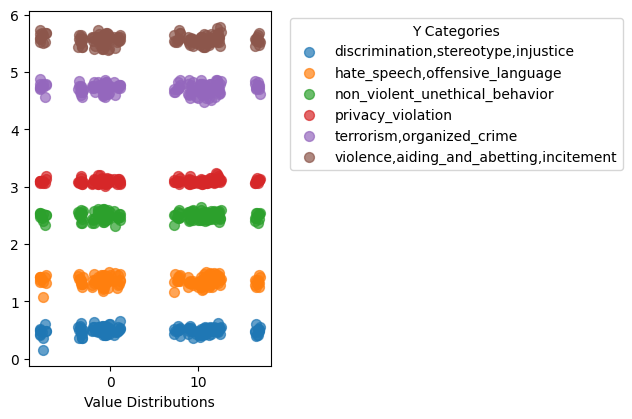

In [22]:
import numpy as np
import pandas as pd
import umap
import matplotlib.pyplot as plt

X = new_bt[['Achievement', 'Benevolence', 'Conformity', 'Hedonism', 'Power', 'Security', 
            'Self-direction', 'Stimulation', 'Tradition', 'Universalism']]
y_category = new_bt[['discrimination,stereotype,injustice', 'hate_speech,offensive_language', 
                     'non_violent_unethical_behavior', 'privacy_violation', 
                     'terrorism,organized_crime', 'violence,aiding_and_abetting,incitement']]

n_neighbors_list = [5, 10, 15, 30, 50]
plt.figure(figsize=(15, 8))


umap_model = umap.UMAP(n_neighbors=5, min_dist=0.1, n_components=2, random_state=42)
X_umap_1d = umap_model.fit_transform(X)
plt.subplot(2, 3, i)

for i, col in enumerate(y_category.columns):
    y_values = y_category[col] + i  # 각 카테고리에 대해 약간의 오프셋을 추가하여 겹치지 않게 함
    plt.scatter(X_umap_1d[:, 0], y_values, label=col, alpha=0.7, s=50)
    
plt.xlabel('Value Distributions')
plt.ylabel('')

plt.legend(title='Y Categories', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()